# 1. INSTALL REQUIRED PACKAGES

In [1]:
!pip install pandas numpy matplotlib seaborn
!pip install vaderSentiment
!pip install scikit-learn
!pip install yfinance 

# 2. IMPORT LIBRARIES

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

# Stock data
import yfinance as yf

# Reddit API
import praw

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# 3. WORK WITH DATASET 1: STOCK PRICE DATA

We will work with 2 stocks from 1/1/2024 to 6/30/2024: TESLA (TSLA) and APPLE (AAPL).

## DOWNDLOAD DATASET 1

In [2]:
# Define stocks to analyze
tickers = ['TSLA', 'AAPL']  # Start with 2 stocks
start_date = '2024-01-01'
end_date = '2024-06-30'

# Dictionary to store all stock data
stock_data_dict = {}

# Download data for each ticker
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    stock_data_dict[ticker] = data
    print(f"  Downloaded {len(data)} trading days")
    print(f"  Date range: {data.index[0].date()} to {data.index[-1].date()}\n")

print("All stock data downloaded successfully!")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  Downloaded 124 trading days
  Date range: 2024-01-02 to 2024-06-28

  Downloaded 124 trading days
  Date range: 2024-01-02 to 2024-06-28

All stock data downloaded successfully!


## EXPLORE THE DATASET 1

### A Brief Look at TSLA

In [3]:
print("="*70)
print("EXPLORING DATASET 1: TSLA")
print("="*70)

ticker = 'TSLA'
df = stock_data_dict[ticker].copy()

print(f"\n📊 Looking at {ticker} data:\n")

print("First 5 rows:")
print(df.head())

print("\n\nDataset info:")
print(f"  • Shape: {df.shape} (rows, columns)")
print(f"  • Columns: {df.columns.tolist()}")
print(f"  • Missing values: {df.isnull().sum().sum()}")

print("\n\nPrice statistics:")
print(df['Close'].describe())


EXPLORING DATASET 1: TSLA

📊 Looking at TSLA data:

First 5 rows:
Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2024-01-02  248.419998  251.250000  244.410004  250.080002  104654200
2024-01-03  238.449997  245.679993  236.320007  244.979996  121082600
2024-01-04  237.929993  242.699997  237.729996  239.250000  102629300
2024-01-05  237.490005  240.119995  234.899994  236.860001   92488900
2024-01-08  240.449997  241.250000  235.300003  236.139999   85166600


Dataset info:
  • Shape: (124, 5) (rows, columns)
  • Columns: [('Close', 'TSLA'), ('High', 'TSLA'), ('Low', 'TSLA'), ('Open', 'TSLA'), ('Volume', 'TSLA')]
  • Missing values: 0


Price statistics:
Ticker        TSLA
count   124.000000
mean    184.905887
std      19.773119
min     142.050003
25%     173.942505
50%     179.910004
75%     192.370003
max     248.419998


### A Brief Look at DATASET 2: AAPL

In [4]:
print("="*70)
print("EXPLORING DATASET 2: AAPL")
print("="*70)

ticker = 'AAPL'
df = stock_data_dict[ticker].copy()

print(f"\n📊 Looking at {ticker} data:\n")

print("First 5 rows:")
print(df.head())

print("\n\nDataset info:")
print(f"  • Shape: {df.shape} (rows, columns)")
print(f"  • Columns: {df.columns.tolist()}")
print(f"  • Missing values: {df.isnull().sum().sum()}")

print("\n\nPrice statistics:")
print(df['Close'].describe())


EXPLORING DATASET 2: AAPL

📊 Looking at AAPL data:

First 5 rows:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  183.903214  186.677021  182.169586  185.399081  82488700
2024-01-03  182.526230  184.140985  181.713894  182.496512  58414500
2024-01-04  180.208145  181.377098  179.187783  180.445890  71983600
2024-01-05  179.484955  181.050175  178.484409  180.287390  62379700
2024-01-08  183.823975  183.863609  179.801961  180.386437  59144500


Dataset info:
  • Shape: (124, 5) (rows, columns)
  • Columns: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]
  • Missing values: 0


Price statistics:
Ticker        AAPL
count   124.000000
mean    182.726732
std      12.680328
min     163.664886
25%     171.337299
50%     182.449272
75%     189.157757
max     215.208328


### Visualize

VISUALIZING STOCK PRICES


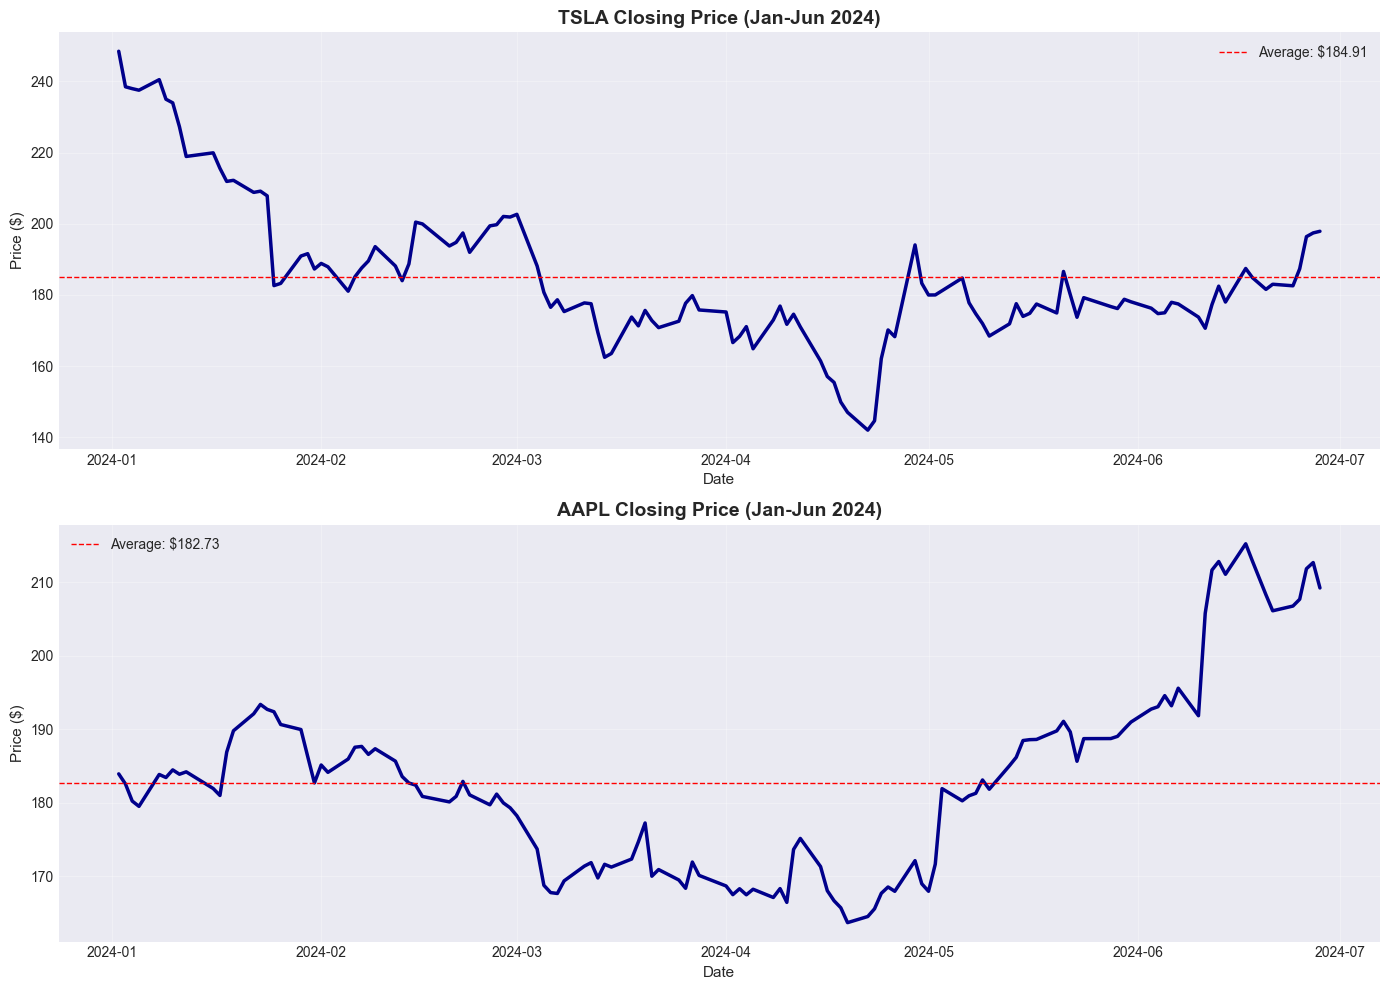

In [5]:
print("="*70)
print("VISUALIZING STOCK PRICES")
print("="*70)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

for idx, ticker in enumerate(tickers):
    df = stock_data_dict[ticker]
    
    axes[idx].plot(df.index, df['Close'], linewidth=2.5, color='darkblue')
    axes[idx].set_title(f'{ticker} Closing Price (Jan-Jun 2024)', 
                        fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Date', fontsize=11)
    axes[idx].set_ylabel('Price ($)', fontsize=11)
    axes[idx].grid(True, alpha=0.3)
    
    # Add some stats on the plot (FIXED)
    avg_price = float(df['Close'].mean())  # Convert to float
    axes[idx].axhline(y=avg_price, color='red', linestyle='--', 
                      linewidth=1, label=f'Average: ${avg_price:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()


## CREATE THE TARGET VARIABLE (UP/DOWN FOR THE NEXT DAY)

**Research Question: Can today's social media sentiment predict tomorrow's stock price movement?**

To answer this, we need to:

Label each day as "UP" or "DOWN" based on what happened the next day

Then later, try to predict these labels using sentiment

In [6]:
#Input (Features): Social media sentiment on a given day
#Output (Target): Did the stock price go UP or DOWN the next day?

print("="*70)
print("CREATING TARGET VARIABLE")
print("="*70)

def create_target_variable(df):
    """
    Create binary target: 1 if next day price went up, 0 if down
    """
    df = df.copy()
    
    # Fix multi-index columns if they exist
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.droplevel(1)
    
    # Get the Close column (handle both Series and DataFrame)
    if isinstance(df['Close'], pd.DataFrame):
        close_series = df['Close'].iloc[:, 0]
    else:
        close_series = df['Close']
    
    # Shift Close price to get next day's price
    df['Next_Close'] = close_series.shift(-1)
    
    # Calculate change in dollars and percentage
    df['Price_Change'] = df['Next_Close'] - close_series
    df['Price_Change_Pct'] = (df['Price_Change'] / close_series) * 100
    
    # Create binary target: 1=UP, 0=DOWN
    df['Target'] = (df['Price_Change'] > 0).astype(int)
    
    # Remove last row (no next day available)
    df = df[:-1]
    
    return df

# Apply to all stocks
for ticker in tickers:
    print(f"\n ## Creating target for {ticker}...")
    stock_data_dict[ticker] = create_target_variable(stock_data_dict[ticker])
    
    # Show example
    example = stock_data_dict[ticker][['Close', 'Next_Close', 'Price_Change', 'Target']].head(5)
    print(example)



CREATING TARGET VARIABLE

 ## Creating target for TSLA...
Price            Close  Next_Close  Price_Change  Target
Date                                                    
2024-01-02  248.419998  238.449997     -9.970001       0
2024-01-03  238.449997  237.929993     -0.520004       0
2024-01-04  237.929993  237.490005     -0.439987       0
2024-01-05  237.490005  240.449997      2.959991       1
2024-01-08  240.449997  234.960007     -5.489990       0

 ## Creating target for AAPL...
Price            Close  Next_Close  Price_Change  Target
Date                                                    
2024-01-02  183.903214  182.526230     -1.376984       0
2024-01-03  182.526230  180.208145     -2.318085       0
2024-01-04  180.208145  179.484955     -0.723190       0
2024-01-05  179.484955  183.823975      4.339020       1
2024-01-08  183.823975  183.407913     -0.416061       0


## ANALYZE TARGET DISTRIBUTION

In [7]:
baseline_accuracies = {}
print("="*70)
print("ANALYZING TARGET DISTRIBUTION")
print("="*70)

for ticker in tickers:
    df = stock_data_dict[ticker]
    
    print(f"\n {ticker} Analysis:")
    print("-" * 50)
    
    # Count UP vs DOWN days
    target_counts = df['Target'].value_counts().sort_index()
    total_days = len(df)
    
    down_days = target_counts[0]
    up_days = target_counts[1]
    
    down_pct = (down_days / total_days) * 100
    up_pct = (up_days / total_days) * 100

    baseline_pct = max(up_pct, down_pct)
    baseline_accuracies[ticker] = baseline_pct / 100
    
    print(f"  Total trading days: {total_days}")
    print(f"  DOWN days (0): {down_days} ({down_pct:.1f}%)")
    print(f"  UP days (1):   {up_days} ({up_pct:.1f}%)")
    
    print(f"\n   ->BASELINE ACCURACY: {max(up_pct, down_pct):.1f}%")
    print(f"     (This is what we need to BEAT with sentiment!)")
    
    # Average gains/losses
    up_data = df[df['Target'] == 1]
    down_data = df[df['Target'] == 0]
    
    print(f"\n  Average UP day: +${up_data['Price_Change'].mean():.2f} (+{up_data['Price_Change_Pct'].mean():.2f}%)")
    print(f"  Average DOWN day: ${down_data['Price_Change'].mean():.2f} ({down_data['Price_Change_Pct'].mean():.2f}%)")

print("\n" + "="*70)
print("STORED BASELINES (for use in evaluation):")
print("="*70)
for ticker, baseline in baseline_accuracies.items():
    print(f"{ticker}: {baseline:.3f} ({baseline*100:.1f}%)")


ANALYZING TARGET DISTRIBUTION

 TSLA Analysis:
--------------------------------------------------
  Total trading days: 123
  DOWN days (0): 66 (53.7%)
  UP days (1):   57 (46.3%)

   ->BASELINE ACCURACY: 53.7%
     (This is what we need to BEAT with sentiment!)

  Average UP day: +$4.20 (+2.42%)
  Average DOWN day: $-4.39 (-2.33%)

 AAPL Analysis:
--------------------------------------------------
  Total trading days: 123
  DOWN days (0): 60 (48.8%)
  UP days (1):   63 (51.2%)

   ->BASELINE ACCURACY: 51.2%
     (This is what we need to BEAT with sentiment!)

  Average UP day: +$2.14 (+1.18%)
  Average DOWN day: $-1.83 (-1.00%)

STORED BASELINES (for use in evaluation):
TSLA: 0.537 (53.7%)
AAPL: 0.512 (51.2%)


### Visualize Target Distribution

VISUALIZING TARGET DISTRIBUTION


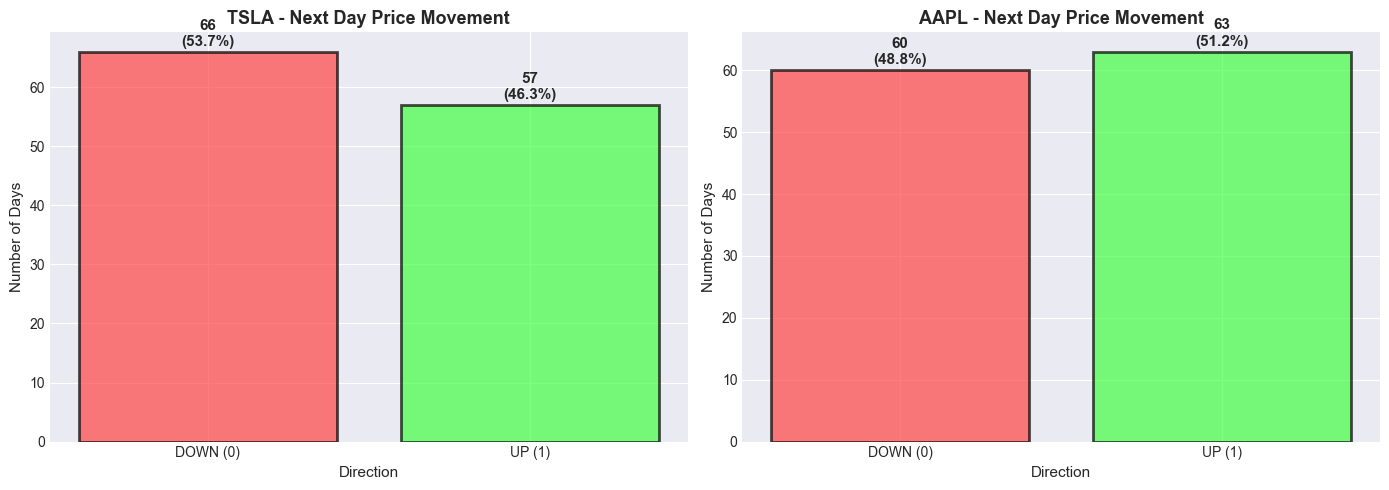

In [8]:
print("="*70)
print("VISUALIZING TARGET DISTRIBUTION")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, ticker in enumerate(tickers):
    df = stock_data_dict[ticker]
    
    target_counts = df['Target'].value_counts().sort_index()
    
    # Bar chart
    bars = axes[idx].bar(['DOWN (0)', 'UP (1)'], 
                         target_counts.values,
                         color=['#ff4444', '#44ff44'], 
                         alpha=0.7, 
                         edgecolor='black', 
                         linewidth=2)
    
    axes[idx].set_title(f'{ticker} - Next Day Price Movement', 
                        fontsize=13, fontweight='bold')
    axes[idx].set_ylabel('Number of Days', fontsize=11)
    axes[idx].set_xlabel('Direction', fontsize=11)
    
    # Add labels on bars
    for i, (bar, count) in enumerate(zip(bars, target_counts.values)):
        pct = (count / len(df)) * 100
        axes[idx].text(bar.get_x() + bar.get_width()/2, 
                      bar.get_height() + 1,
                      f'{count}\n({pct:.1f}%)',
                      ha='center', 
                      fontsize=11, 
                      fontweight='bold')

plt.tight_layout()
plt.show()


## SAVE PROCESSED DATA FROM DATASET 1

In [9]:
print("="*70)
print("SAVING PROCESSED DATA")
print("="*70)

# Save each stock to CSV
for ticker in tickers:
    filename = f'{ticker}_processed.csv'
    stock_data_dict[ticker].to_csv(filename)
    print(f"💾 Saved {ticker} data to {filename}")


SAVING PROCESSED DATA
💾 Saved TSLA data to TSLA_processed.csv
💾 Saved AAPL data to AAPL_processed.csv


## SUMMARY OF DATASET 1

What we accomplished so far:

1. Downloaded 6 months of stock data for TSLA and AAPL
2. Explored and visualized the data
3. Created Target variable (UP=1, DOWN=0)\
4. Analyzed baseline accuracy
5. Saved processed data in two csv files 

**Quick stats**

In [10]:
for ticker in tickers:
    df = stock_data_dict[ticker]
    baseline = max(df['Target'].mean(), 1 - df['Target'].mean()) * 100
    print(f"   {ticker}: {len(df)} days, Baseline accuracy: {baseline:.1f}% (WHAT WE NEED TO BEAT!)")

   TSLA: 123 days, Baseline accuracy: 53.7% (WHAT WE NEED TO BEAT!)
   AAPL: 123 days, Baseline accuracy: 51.2% (WHAT WE NEED TO BEAT!)


**Next Step will be moving to Dataset 2: Collect social media sentiment data**

# 4. WORK WITH DATASET 2: SOCIAL MEDIA SENTIMENT DATA

## GENERATES REALISTIC SENTIMENT DATA 

In [11]:
def generate_realistic_sentiment_data(stock_df, ticker, volatility=0.3):
    """
    Generate realistic sentiment data that models social media patterns
    
    Parameters:
    - stock_df: DataFrame with stock price data
    - ticker: Stock symbol (TSLA or AAPL)
    - volatility: Controls how noisy the sentiment is (0.3 = realistic)
    
    Returns:
    - DataFrame with daily sentiment scores
    """
    sentiment_data = []
    
    # Make sure we have the Date column properly
    df_copy = stock_df.copy()
    if 'Date' not in df_copy.columns:
        df_copy = df_copy.reset_index()  # Move index to column if Date is in index
    
    for idx, row in df_copy.iterrows():
        # Get date - handle both column and index cases
        if 'Date' in df_copy.columns:
            date = row['Date']
        else:
            date = row.name
            
        price_change = row['Price_Change_Pct']
        
        # MODEL 1: Base sentiment correlates weakly with previous day's price movement
        # Takes yesterday's price change percentage
        # Multiplies by 0.01 (1%) to create a WEAK influence
        # Reason: In real life, when a stock goes up, people tend to post slightly more positive comments the next day
        # Example: If TSLA went up 5% yesterday → base_sentiment = 0.05 * 0.01 = 0.0005
        # If TSLA went down 3% yesterday → base_sentiment = -0.03 * 0.01 = -0.0003
        if idx > 0:
            prev_change = df_copy.iloc[idx-1]['Price_Change_Pct'] # price change of yesterday
            base_sentiment = prev_change * 0.01  # weak correlation
        else:
            base_sentiment = 0

        
        # MODEL 2: Add realistic random noise
        # Adds random noise from a normal distribution (bell curve)
        # volatility=0.3 means the noise typically ranges from -0.6 to +0.6
        # Clips the final score between -1 and +1 (VADER sentiment range)
        # Reason: Social media is NOISY! People post based on emotions, rumors, memes
        # The random noise is much LARGER than the lag effect, making sentiment mostly unpredictable
        # Example:
        # base_sentiment = 0.0005
        # noise = 0.42 (random)
        # sentiment_score = 0.0005 + 0.42 = 0.4205 (positive sentiment)
        noise = np.random.normal(0, volatility)
        sentiment_score = np.clip(base_sentiment + noise, -1, 1)
        
        # MODEL 3: Post volume increases with price volatility
        # Base posts: ~15 posts per day on average (Poisson distribution gives realistic variation)
        # Volatility bonus: More posts when price moves a lot
        # Reason: People talk MORE when stocks make big moves (up OR down)
        # Example: 
        # >Normal day (price change = 0.5%):
        # base_posts = 14 (random around 15)
        # volatility_bonus = 0.5 * 2 = 1
        # post_count = 14 + 1 = 15 posts
        # >Volatile day (price change = 10%):
        # base_posts = 17
        # volatility_bonus = 10 * 2 = 20
        # post_count = 17 + 20 = 37 posts (way more discussion!)
        volatility_factor = abs(price_change)
        base_posts = np.random.poisson(15) # Average 15 posts per day
        volatility_bonus = int(volatility_factor * 2)
        post_count = max(1, base_posts + volatility_bonus)
        
        # MODEL 4: Engagement metrics
        # Each post gets 50-200 upvotes on average
        # Each post gets 5-30 comments on average
        # These scale with post count (more posts = more total engagement)
        # Example:
        # 15 posts * 100 upvotes/post = 1,500 total upvotes for the day
        # 15 posts * 20 comments/post = 300 total comments for the day
        total_upvotes = int(post_count * np.random.uniform(50, 200))
        total_comments = int(post_count * np.random.uniform(5, 30))


        # GENERAL MODEL (MODEL 5): Opinion Diversity
        # Standard deviation of sentiment (how much people disagree)
        # 0.2 = most people agree
        # 0.5 = opinions are very mixed
        std_sentiment = np.random.uniform(0.2, 0.5)
        
        sentiment_data.append({
            'Date': date,
            'avg_sentiment': round(sentiment_score, 4),
            'std_sentiment': round(std_sentiment, 4),
            'post_count': post_count,
            'total_upvotes': total_upvotes,
            'total_comments': total_comments,
            'ticker': ticker
        })
    
    return pd.DataFrame(sentiment_data)

# Generate sentiment data
print("\nGenerating sentiment data for TSLA and AAPL...")

sentiment_daily = {}
for ticker in tickers:
    sentiment_daily[ticker] = generate_realistic_sentiment_data(
        stock_data_dict[ticker], 
        ticker,
        volatility=0.3
    )
    print(f"\n{ticker} Sentiment Data Generated:")
    print(f"   • Total days: {len(sentiment_daily[ticker])}")
    print(f"   • Average sentiment: {sentiment_daily[ticker]['avg_sentiment'].mean():.3f}")
    print(f"   • Sentiment range: [{sentiment_daily[ticker]['avg_sentiment'].min():.3f}, {sentiment_daily[ticker]['avg_sentiment'].max():.3f}]")
    print(f"   • Average posts per day: {sentiment_daily[ticker]['post_count'].mean():.1f}")


Generating sentiment data for TSLA and AAPL...

TSLA Sentiment Data Generated:
   • Total days: 123
   • Average sentiment: -0.010
   • Sentiment range: [-0.846, 0.703]
   • Average posts per day: 19.9

AAPL Sentiment Data Generated:
   • Total days: 123
   • Average sentiment: -0.043
   • Sentiment range: [-0.696, 0.572]
   • Average posts per day: 17.1


## VISUALIZE


VISUALIZING SENTIMENT DATA


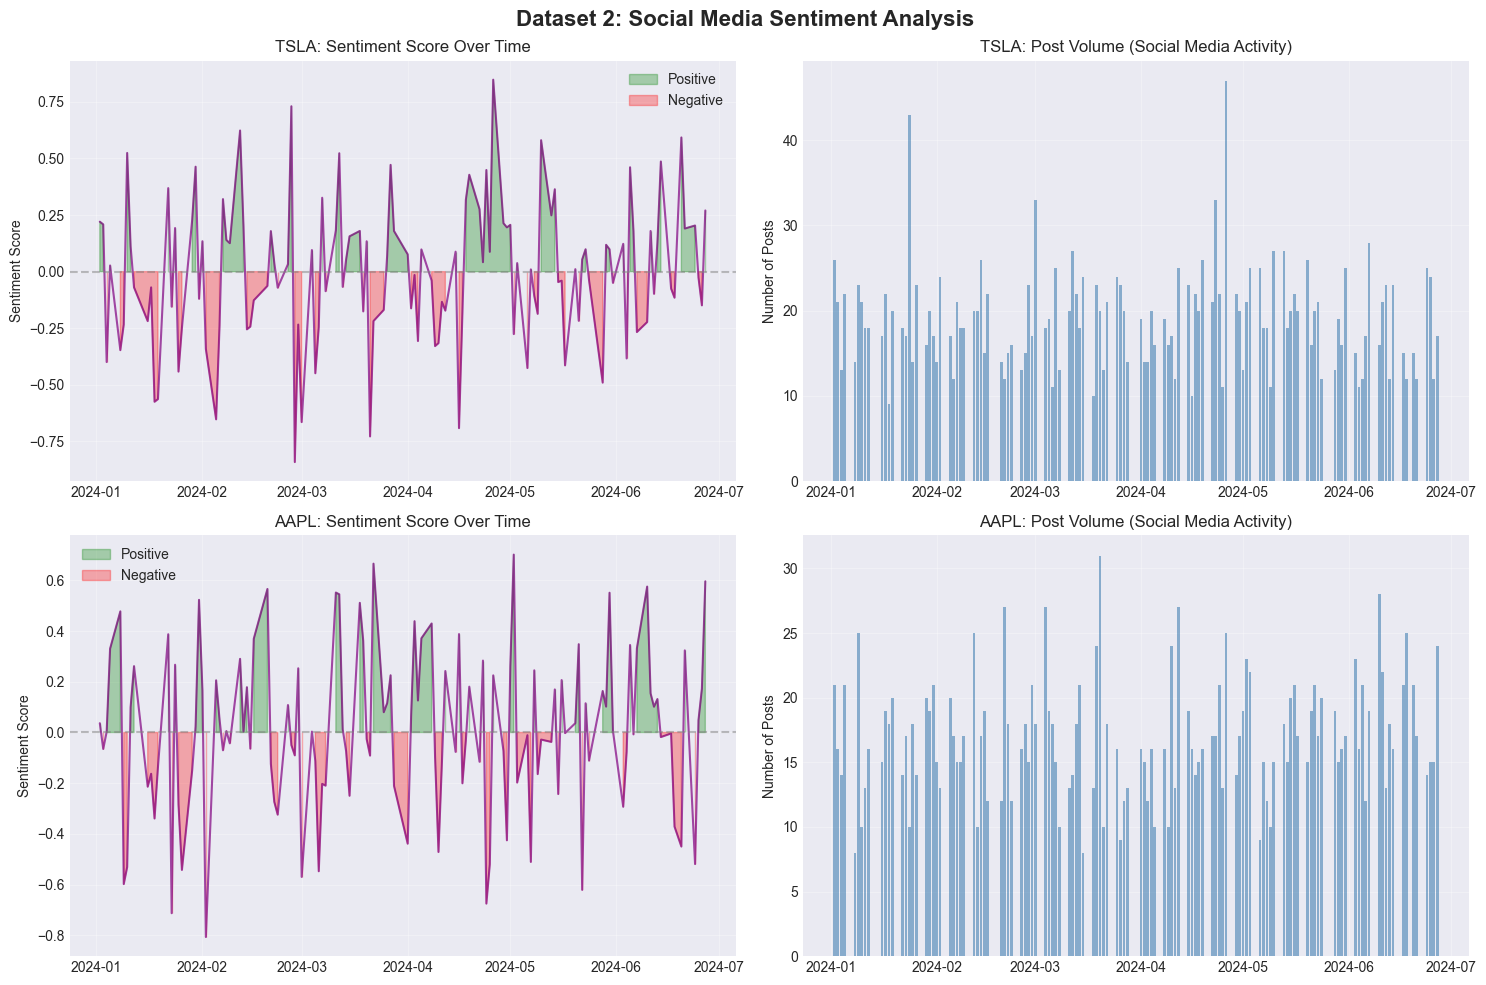

In [13]:
print("\n" + "="*70)
print("VISUALIZING SENTIMENT DATA")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Dataset 2: Social Media Sentiment Analysis', fontsize=16, fontweight='bold')

for idx, ticker in enumerate(tickers):
    df = sentiment_daily[ticker]
    
    # Plot 1: Sentiment Score Over Time
    axes[idx, 0].plot(df['Date'], df['avg_sentiment'], color='purple', linewidth=1.5, alpha=0.7)
    axes[idx, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[idx, 0].fill_between(df['Date'], df['avg_sentiment'], 0, 
                               where=(df['avg_sentiment'] > 0), color='green', alpha=0.3, label='Positive')
    axes[idx, 0].fill_between(df['Date'], df['avg_sentiment'], 0, 
                               where=(df['avg_sentiment'] <= 0), color='red', alpha=0.3, label='Negative')
    axes[idx, 0].set_title(f'{ticker}: Sentiment Score Over Time')
    axes[idx, 0].set_ylabel('Sentiment Score')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Plot 2: Post Volume Over Time
    axes[idx, 1].bar(df['Date'], df['post_count'], color='steelblue', alpha=0.6)
    axes[idx, 1].set_title(f'{ticker}: Post Volume (Social Media Activity)')
    axes[idx, 1].set_ylabel('Number of Posts')
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## SENTIMENT DISTRIBUTION ANALYSIS


SENTIMENT DISTRIBUTION ANALYSIS


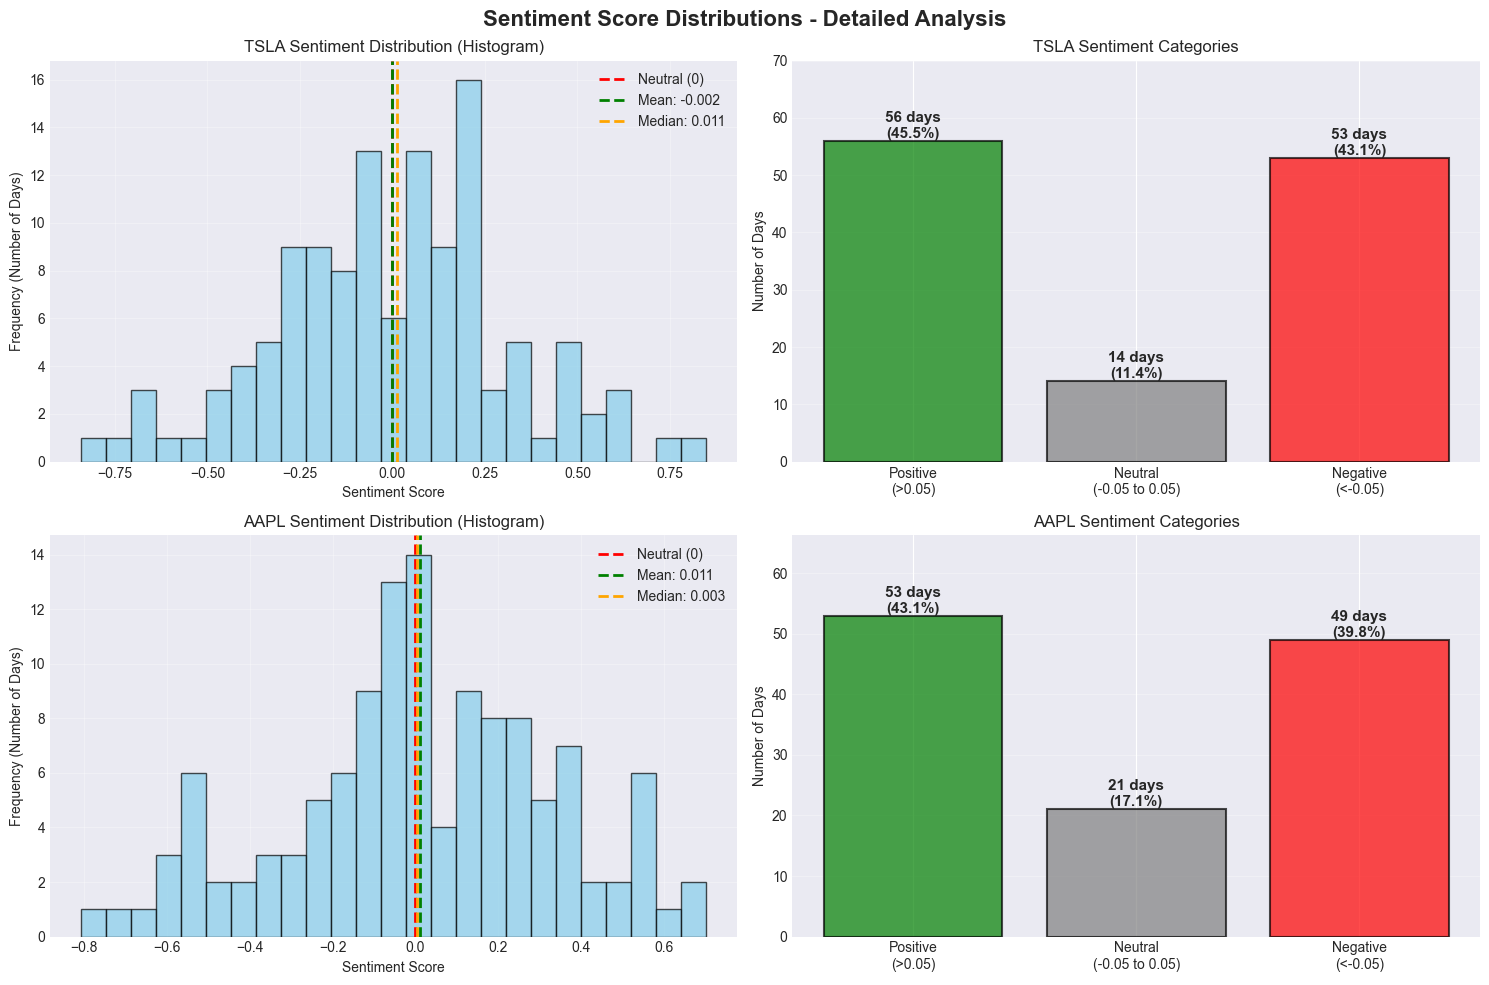

In [14]:
print("\n" + "="*70)
print("SENTIMENT DISTRIBUTION ANALYSIS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sentiment Score Distributions - Detailed Analysis', fontsize=16, fontweight='bold')

for idx, ticker in enumerate(tickers):
    df = sentiment_daily[ticker]
    
    # Plot 1: Histogram (Left)
    axes[idx, 0].hist(df['avg_sentiment'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral (0)')
    axes[idx, 0].axvline(x=df['avg_sentiment'].mean(), color='green', linestyle='--', linewidth=2, 
                         label=f'Mean: {df["avg_sentiment"].mean():.3f}')
    axes[idx, 0].axvline(x=df['avg_sentiment'].median(), color='orange', linestyle='--', linewidth=2,
                         label=f'Median: {df["avg_sentiment"].median():.3f}')
    axes[idx, 0].set_title(f'{ticker} Sentiment Distribution (Histogram)')
    axes[idx, 0].set_xlabel('Sentiment Score')
    axes[idx, 0].set_ylabel('Frequency (Number of Days)')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Plot 2: Category Bar Chart (Right)
    # Categorize sentiment
    positive = (df['avg_sentiment'] > 0.05).sum()
    neutral = ((df['avg_sentiment'] >= -0.05) & (df['avg_sentiment'] <= 0.05)).sum()
    negative = (df['avg_sentiment'] < -0.05).sum()
    
    categories = ['Positive\n(>0.05)', 'Neutral\n(-0.05 to 0.05)', 'Negative\n(<-0.05)']
    counts = [positive, neutral, negative]
    colors = ['green', 'gray', 'red']
    
    bars = axes[idx, 1].bar(categories, counts, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    
    # Add count labels on top of bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        axes[idx, 1].text(bar.get_x() + bar.get_width()/2., height,
                         f'{count} days\n({count/len(df)*100:.1f}%)',
                         ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    axes[idx, 1].set_title(f'{ticker} Sentiment Categories')
    axes[idx, 1].set_ylabel('Number of Days')
    axes[idx, 1].set_ylim(0, max(counts) * 1.25)  # Add space for labels
    axes[idx, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



## SENTIMENT STATISTICS

In [15]:
print("\n" + "="*70)
print("SENTIMENT STATISTICS SUMMARY")
print("="*70)

for ticker in tickers:
    df = sentiment_daily[ticker]
    
    print(f"\n >{ticker} Sentiment Statistics:")
    print(f"   Mean Sentiment:    {df['avg_sentiment'].mean():>8.4f}")
    print(f"   Median Sentiment:  {df['avg_sentiment'].median():>8.4f}")
    print(f"   Std Dev:           {df['avg_sentiment'].std():>8.4f}")
    print(f"   Min Sentiment:     {df['avg_sentiment'].min():>8.4f}")
    print(f"   Max Sentiment:     {df['avg_sentiment'].max():>8.4f}")
    print(f"   ")
    print(f"   Positive Days:     {(df['avg_sentiment'] > 0.05).sum():>3} ({(df['avg_sentiment'] > 0.05).sum()/len(df)*100:.1f}%)")
    print(f"   Neutral Days:      {((df['avg_sentiment'] >= -0.05) & (df['avg_sentiment'] <= 0.05)).sum():>3} ({((df['avg_sentiment'] >= -0.05) & (df['avg_sentiment'] <= 0.05)).sum()/len(df)*100:.1f}%)")
    print(f"   Negative Days:     {(df['avg_sentiment'] < -0.05).sum():>3} ({(df['avg_sentiment'] < -0.05).sum()/len(df)*100:.1f}%)")
    print(f"   ")
    print(f"   Average Posts/Day:    {df['post_count'].mean():>6.1f}")
    print(f"   Average Upvotes/Day:  {df['total_upvotes'].mean():>6.0f}")
    print(f"   Average Comments/Day: {df['total_comments'].mean():>6.0f}")


SENTIMENT STATISTICS SUMMARY

 >TSLA Sentiment Statistics:
   Mean Sentiment:     -0.0020
   Median Sentiment:    0.0111
   Std Dev:             0.3131
   Min Sentiment:      -0.8410
   Max Sentiment:       0.8481
   
   Positive Days:      56 (45.5%)
   Neutral Days:       14 (11.4%)
   Negative Days:      53 (43.1%)
   
   Average Posts/Day:      19.1
   Average Upvotes/Day:    2469
   Average Comments/Day:    342

 >AAPL Sentiment Statistics:
   Mean Sentiment:      0.0109
   Median Sentiment:    0.0034
   Std Dev:             0.3224
   Min Sentiment:      -0.8069
   Max Sentiment:       0.7018
   
   Positive Days:      53 (43.1%)
   Neutral Days:       21 (17.1%)
   Negative Days:      49 (39.8%)
   
   Average Posts/Day:      17.0
   Average Upvotes/Day:    2152
   Average Comments/Day:    293


## SAVE SENTIMENT DATA

In [16]:
print("\n" + "="*70)
print("SAVING SENTIMENT DATA")
print("="*70)

for ticker in tickers:
    filename = f'{ticker}_sentiment_daily.csv'
    sentiment_daily[ticker].to_csv(filename, index=False)
    print(f"💾 Saved {ticker} sentiment data to {filename}")

print("\n Dataset 2 Complete!")


SAVING SENTIMENT DATA
💾 Saved TSLA sentiment data to TSLA_sentiment_daily.csv
💾 Saved AAPL sentiment data to AAPL_sentiment_daily.csv

 Dataset 2 Complete!


## PREVIEW DATA

In [17]:
print("\n" + "="*70)
print("PREVIEW: SENTIMENT DATA")
print("="*70)

for ticker in tickers:
    print(f"\n{ticker} Sentiment Data (First 10 days):")
    print(sentiment_daily[ticker].head(10).to_string(index=False))


PREVIEW: SENTIMENT DATA

TSLA Sentiment Data (First 10 days):
      Date  avg_sentiment  std_sentiment  post_count  total_upvotes  total_comments ticker
2024-01-02         0.2208         0.4356          26           3632             594   TSLA
2024-01-03         0.2088         0.2034          21           3085             233   TSLA
2024-01-04        -0.3991         0.4993          13           1050             257   TSLA
2024-01-05         0.0274         0.4903          22           2006             196   TSLA
2024-01-08        -0.3466         0.3730          14           1513             359   TSLA
2024-01-09        -0.2336         0.2956          23           4402             116   TSLA
2024-01-10         0.5244         0.3453          21           1776             385   TSLA
2024-01-11         0.1122         0.4808          18           2012             263   TSLA
2024-01-12        -0.0693         0.3573          18           2605             332   TSLA
2024-01-16        -0.2184  

**Next step will be moving to  Dataset 3: Merging & Prediction Models**

# 5. WORK WITH DATASET 3: MERGING & PREDICTION MODELS

## DATA LOADING

In [18]:
print("-" * 70)
print("DATA LOADING")
print("-" * 70)

# Load stock price data
tsla_stock = pd.read_csv('TSLA_processed.csv')
aapl_stock = pd.read_csv('AAPL_processed.csv')

# Load sentiment data
tsla_sentiment = pd.read_csv('TSLA_sentiment_daily.csv')
aapl_sentiment = pd.read_csv('AAPL_sentiment_daily.csv')

print(f"TSLA Stock Data: {tsla_stock.shape[0]} rows, {tsla_stock.shape[1]} columns")
print(f"AAPL Stock Data: {aapl_stock.shape[0]} rows, {aapl_stock.shape[1]} columns")
print(f"TSLA Sentiment Data: {tsla_sentiment.shape[0]} rows, {tsla_sentiment.shape[1]} columns")
print(f"AAPL Sentiment Data: {aapl_sentiment.shape[0]} rows, {aapl_sentiment.shape[1]} columns")
print()

# Display sample of each dataset
print("Sample of TSLA Stock Data:")
print(tsla_stock.head(3))
print()
print("Sample of TSLA Sentiment Data:")
print(tsla_sentiment.head(3))
print()

----------------------------------------------------------------------
DATA LOADING
----------------------------------------------------------------------
TSLA Stock Data: 123 rows, 10 columns
AAPL Stock Data: 123 rows, 10 columns
TSLA Sentiment Data: 123 rows, 7 columns
AAPL Sentiment Data: 123 rows, 7 columns

Sample of TSLA Stock Data:
         Date       Close        High         Low        Open     Volume  \
0  2024-01-02  248.419998  251.250000  244.410004  250.080002  104654200   
1  2024-01-03  238.449997  245.679993  236.320007  244.979996  121082600   
2  2024-01-04  237.929993  242.699997  237.729996  239.250000  102629300   

   Next_Close  Price_Change  Price_Change_Pct  Target  
0  238.449997     -9.970001         -4.013365       0  
1  237.929993     -0.520004         -0.218077       0  
2  237.490005     -0.439987         -0.184923       0  

Sample of TSLA Sentiment Data:
         Date  avg_sentiment  std_sentiment  post_count  total_upvotes  \
0  2024-01-02         0.

## DATA MERGING

In [19]:
print("\n" + "-"*70)
print("MERGING STOCK & SENTIMENT DATA")
print("-" * 70)

# Convert Date columns to datetime format for proper merging
tsla_stock['Date'] = pd.to_datetime(tsla_stock['Date'])
aapl_stock['Date'] = pd.to_datetime(aapl_stock['Date'])
tsla_sentiment['Date'] = pd.to_datetime(tsla_sentiment['Date'])
aapl_sentiment['Date'] = pd.to_datetime(aapl_sentiment['Date'])

# Merge datasets on Date
tsla_merged = pd.merge(tsla_stock, tsla_sentiment, on='Date', how='inner')
aapl_merged = pd.merge(aapl_stock, aapl_sentiment, on='Date', how='inner')

print(f"TSLA Merged Dataset: {tsla_merged.shape[0]} rows, {tsla_merged.shape[1]} columns")
print(f"AAPL Merged Dataset: {aapl_merged.shape[0]} rows, {aapl_merged.shape[1]} columns")
print()

# Check for any missing values after merge
print("Missing values in TSLA merged data:")
print(tsla_merged.isnull().sum())
print()
print("Missing values in AAPL merged data:")
print(aapl_merged.isnull().sum())
print()

# Display merged data sample
print("Sample of TSLA Merged Data (first 3 rows):")
print(tsla_merged.head(3))
print()


----------------------------------------------------------------------
MERGING STOCK & SENTIMENT DATA
----------------------------------------------------------------------
TSLA Merged Dataset: 123 rows, 16 columns
AAPL Merged Dataset: 123 rows, 16 columns

Missing values in TSLA merged data:
Date                0
Close               0
High                0
Low                 0
Open                0
Volume              0
Next_Close          0
Price_Change        0
Price_Change_Pct    0
Target              0
avg_sentiment       0
std_sentiment       0
post_count          0
total_upvotes       0
total_comments      0
ticker              0
dtype: int64

Missing values in AAPL merged data:
Date                0
Close               0
High                0
Low                 0
Open                0
Volume              0
Next_Close          0
Price_Change        0
Price_Change_Pct    0
Target              0
avg_sentiment       0
std_sentiment       0
post_count          0
total_upvotes    

## FEATURE ENGINEERING

In [20]:
print("\n" + "-"*70)
print("SECTION 3: Feature Engineering")
print("-" * 70)

def create_features(df, ticker_name):
    """
    Create additional features for prediction models
    
    Features created:
    - Price features: Close, Price_Change, Price_Change_Pct
    - Sentiment features: avg_sentiment, std_sentiment, post_count
    - Volume features: Volume, total_upvotes, total_comments
    - Interaction features: sentiment_volume_interaction
    """
    df = df.copy()
    
    # Create interaction feature: sentiment * post volume
    df['sentiment_volume_interaction'] = df['avg_sentiment'] * df['post_count']
    
    # Create sentiment momentum (requires at least 2 rows)
    if len(df) > 1:
        df['sentiment_change'] = df['avg_sentiment'].diff()
    else:
        df['sentiment_change'] = 0
    
    # Remove first row with NaN sentiment_change
    df = df.dropna()
    
    print(f"{ticker_name} features created: {df.shape[1]} total columns")
    
    return df

# Create features for both stocks
tsla_final = create_features(tsla_merged, 'TSLA')
aapl_final = create_features(aapl_merged, 'AAPL')

print()
print("Feature columns in final dataset:")
print(list(tsla_final.columns))
print()

# Save merged datasets
tsla_final.to_csv('TSLA_final_merged.csv', index=False)
aapl_final.to_csv('AAPL_final_merged.csv', index=False)
print("Merged datasets saved: TSLA_final_merged.csv, AAPL_final_merged.csv")
print()


----------------------------------------------------------------------
SECTION 3: Feature Engineering
----------------------------------------------------------------------
TSLA features created: 18 total columns
AAPL features created: 18 total columns

Feature columns in final dataset:
['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Next_Close', 'Price_Change', 'Price_Change_Pct', 'Target', 'avg_sentiment', 'std_sentiment', 'post_count', 'total_upvotes', 'total_comments', 'ticker', 'sentiment_volume_interaction', 'sentiment_change']

Merged datasets saved: TSLA_final_merged.csv, AAPL_final_merged.csv



## DATA SPLITTING

In [21]:
print("\n" + "-"*70)
print("TRAIN-TEST SPLIT (80-20)")
print("-" * 70)

def split_data(df, ticker_name):
    """
    Split data into training and testing sets (80-20 split)
    Returns: X_train, X_test, y_train, y_test
    """
    # Define feature sets
    price_features = ['Close', 'Price_Change_Pct', 'Volume']
    sentiment_features = ['avg_sentiment', 'std_sentiment', 'post_count', 
                         'total_upvotes', 'total_comments', 
                         'sentiment_volume_interaction', 'sentiment_change']
    combined_features = price_features + sentiment_features
    
    # Target variable
    y = df['Target']
    
    # Create feature matrices
    X_price = df[price_features]
    X_sentiment = df[sentiment_features]
    X_combined = df[combined_features]
    
    # 80-20 split (using random_state for reproducibility)
    X_price_train, X_price_test, y_train, y_test = train_test_split(
        X_price, y, test_size=0.2, random_state=42, stratify=y
    )
    
    X_sentiment_train, X_sentiment_test, _, _ = train_test_split(
        X_sentiment, y, test_size=0.2, random_state=42, stratify=y
    )
    
    X_combined_train, X_combined_test, _, _ = train_test_split(
        X_combined, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"\n{ticker_name} Data Split:")
    print(f"  Training samples: {len(X_price_train)} ({len(X_price_train)/len(df)*100:.1f}%)")
    print(f"  Testing samples: {len(X_price_test)} ({len(X_price_test)/len(df)*100:.1f}%)")
    print(f"  Target distribution in training set:")
    print(f"    UP (1): {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)")
    print(f"    DOWN (0): {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)")
    
    return {
        'price': (X_price_train, X_price_test),
        'sentiment': (X_sentiment_train, X_sentiment_test),
        'combined': (X_combined_train, X_combined_test),
        'y': (y_train, y_test)
    }

# Split data for both stocks
tsla_splits = split_data(tsla_final, 'TSLA')
aapl_splits = split_data(aapl_final, 'AAPL')


----------------------------------------------------------------------
TRAIN-TEST SPLIT (80-20)
----------------------------------------------------------------------

TSLA Data Split:
  Training samples: 97 (79.5%)
  Testing samples: 25 (20.5%)
  Target distribution in training set:
    UP (1): 45 (46.4%)
    DOWN (0): 52 (53.6%)

AAPL Data Split:
  Training samples: 97 (79.5%)
  Testing samples: 25 (20.5%)
  Target distribution in training set:
    UP (1): 50 (51.5%)
    DOWN (0): 47 (48.5%)


## FEATURE SCALING

In [22]:
print("\n" + "-"*70)
print("FEATURE SCALING (STANDARDLIZATION)")
print("-" * 70)

def scale_features(train_data, test_data, feature_type):
    """
    Standardize features to have mean=0 and std=1
    This helps logistic regression converge faster and perform better
    """
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    
    print(f"{feature_type} features scaled")
    print(f"  Training set shape: {train_scaled.shape}")
    print(f"  Testing set shape: {test_scaled.shape}")
    
    return train_scaled, test_scaled, scaler

# Scale TSLA features
print("\nTSLA Feature Scaling:")
tsla_price_train_scaled, tsla_price_test_scaled, tsla_price_scaler = scale_features(
    tsla_splits['price'][0], tsla_splits['price'][1], 'Price-only'
)
tsla_sentiment_train_scaled, tsla_sentiment_test_scaled, tsla_sentiment_scaler = scale_features(
    tsla_splits['sentiment'][0], tsla_splits['sentiment'][1], 'Sentiment-only'
)
tsla_combined_train_scaled, tsla_combined_test_scaled, tsla_combined_scaler = scale_features(
    tsla_splits['combined'][0], tsla_splits['combined'][1], 'Combined'
)

# Scale AAPL features
print("\nAAPL Feature Scaling:")
aapl_price_train_scaled, aapl_price_test_scaled, aapl_price_scaler = scale_features(
    aapl_splits['price'][0], aapl_splits['price'][1], 'Price-only'
)
aapl_sentiment_train_scaled, aapl_sentiment_test_scaled, aapl_sentiment_scaler = scale_features(
    aapl_splits['sentiment'][0], aapl_splits['sentiment'][1], 'Sentiment-only'
)
aapl_combined_train_scaled, aapl_combined_test_scaled, aapl_combined_scaler = scale_features(
    aapl_splits['combined'][0], aapl_splits['combined'][1], 'Combined'
)


----------------------------------------------------------------------
FEATURE SCALING (STANDARDLIZATION)
----------------------------------------------------------------------

TSLA Feature Scaling:
Price-only features scaled
  Training set shape: (97, 3)
  Testing set shape: (25, 3)
Sentiment-only features scaled
  Training set shape: (97, 7)
  Testing set shape: (25, 7)
Combined features scaled
  Training set shape: (97, 10)
  Testing set shape: (25, 10)

AAPL Feature Scaling:
Price-only features scaled
  Training set shape: (97, 3)
  Testing set shape: (25, 3)
Sentiment-only features scaled
  Training set shape: (97, 7)
  Testing set shape: (25, 7)
Combined features scaled
  Training set shape: (97, 10)
  Testing set shape: (25, 10)


## *LOGISTIC REGRESSION MODELS TRAINING

**Important Note**: Sklearn's LogisticRegression already uses L2 regularization

In [23]:
print("\n" + "-"*70)
print("BUILD LOGISTIC REGRESSION MODELS")
print("-" * 70)
print("\nLogistic Regression Parameters:")
print("  - Max iterations: 1000")
print("  - Random state: 42 (for reproducibility)")
print()

def train_model(X_train, y_train, model_name):
    """
    Train a logistic regression model
    
    Logistic Regression is chosen because:
    - Binary classification (UP vs DOWN)
    - Interpretable coefficients
    - Probabilistic outputs
    - Computationally efficient
    """
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    print(f" {model_name} trained successfully")
    return model

# Train TSLA models
print("Training TSLA Models:")
tsla_model_price = train_model(tsla_price_train_scaled, tsla_splits['y'][0], 
                                "TSLA Price-only Model")
tsla_model_sentiment = train_model(tsla_sentiment_train_scaled, tsla_splits['y'][0], 
                                    "TSLA Sentiment-only Model")
tsla_model_combined = train_model(tsla_combined_train_scaled, tsla_splits['y'][0], 
                                   "TSLA Combined Model")

# Train AAPL models
print("\nTraining AAPL Models:")
aapl_model_price = train_model(aapl_price_train_scaled, aapl_splits['y'][0], 
                                "AAPL Price-only Model")
aapl_model_sentiment = train_model(aapl_sentiment_train_scaled, aapl_splits['y'][0], 
                                    "AAPL Sentiment-only Model")
aapl_model_combined = train_model(aapl_combined_train_scaled, aapl_splits['y'][0], 
                                   "AAPL Combined Model")


----------------------------------------------------------------------
BUILD LOGISTIC REGRESSION MODELS
----------------------------------------------------------------------

Logistic Regression Parameters:
  - Max iterations: 1000
  - Random state: 42 (for reproducibility)

Training TSLA Models:
 TSLA Price-only Model trained successfully
 TSLA Sentiment-only Model trained successfully
 TSLA Combined Model trained successfully

Training AAPL Models:
 AAPL Price-only Model trained successfully
 AAPL Sentiment-only Model trained successfully
 AAPL Combined Model trained successfully


## MODEL EVALUATION

In [24]:
print("\n" + "-"*70)
print("MODEL EVALUATION")
print("-" * 70)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate model performance on training and testing sets
    
    Metrics:
    - Accuracy: Overall correctness
    - Precision: Of predicted UPs, how many were actually UP
    - Recall: Of actual UPs, how many did we catch
    - F1-Score: Harmonic mean of precision and recall
    - ROC-AUC: Area under ROC curve (probability ranking quality) -> Probability ranking quality 
    """
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Probabilities (for ROC-AUC)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results = {
        'Model': model_name,
        'Train_Accuracy': accuracy_score(y_train, y_train_pred),
        'Test_Accuracy': accuracy_score(y_test, y_test_pred),
        'Test_Precision': precision_score(y_test, y_test_pred, zero_division=0),
        'Test_Recall': recall_score(y_test, y_test_pred, zero_division=0),
        'Test_F1': f1_score(y_test, y_test_pred, zero_division=0),
        'Test_ROC_AUC': roc_auc_score(y_test, y_test_proba),
        'predictions': y_test_pred,
        'probabilities': y_test_proba
    }
    
    return results

# Evaluate TSLA models
print("\nEvaluating TSLA Models:")
tsla_results = []

tsla_price_results = evaluate_model(
    tsla_model_price, tsla_price_train_scaled, tsla_price_test_scaled,
    tsla_splits['y'][0], tsla_splits['y'][1], 'Price-only'
)
tsla_results.append(tsla_price_results)
print(f"> {tsla_price_results['Model']}: Test Accuracy = {tsla_price_results['Test_Accuracy']:.4f}")

tsla_sentiment_results = evaluate_model(
    tsla_model_sentiment, tsla_sentiment_train_scaled, tsla_sentiment_test_scaled,
    tsla_splits['y'][0], tsla_splits['y'][1], 'Sentiment-only'
)
tsla_results.append(tsla_sentiment_results)
print(f"> {tsla_sentiment_results['Model']}: Test Accuracy = {tsla_sentiment_results['Test_Accuracy']:.4f}")

tsla_combined_results = evaluate_model(
    tsla_model_combined, tsla_combined_train_scaled, tsla_combined_test_scaled,
    tsla_splits['y'][0], tsla_splits['y'][1], 'Combined'
)
tsla_results.append(tsla_combined_results)
print(f"> {tsla_combined_results['Model']}: Test Accuracy = {tsla_combined_results['Test_Accuracy']:.4f}")

# Evaluate AAPL models
print("\nEvaluating AAPL Models:")
aapl_results = []

aapl_price_results = evaluate_model(
    aapl_model_price, aapl_price_train_scaled, aapl_price_test_scaled,
    aapl_splits['y'][0], aapl_splits['y'][1], 'Price-only'
)
aapl_results.append(aapl_price_results)
print(f"> {aapl_price_results['Model']}: Test Accuracy = {aapl_price_results['Test_Accuracy']:.4f}")

aapl_sentiment_results = evaluate_model(
    aapl_model_sentiment, aapl_sentiment_train_scaled, aapl_sentiment_test_scaled,
    aapl_splits['y'][0], aapl_splits['y'][1], 'Sentiment-only'
)
aapl_results.append(aapl_sentiment_results)
print(f"> {aapl_sentiment_results['Model']}: Test Accuracy = {aapl_sentiment_results['Test_Accuracy']:.4f}")

aapl_combined_results = evaluate_model(
    aapl_model_combined, aapl_combined_train_scaled, aapl_combined_test_scaled,
    aapl_splits['y'][0], aapl_splits['y'][1], 'Combined'
)
aapl_results.append(aapl_combined_results)
print(f"> {aapl_combined_results['Model']}: Test Accuracy = {aapl_combined_results['Test_Accuracy']:.4f}")


----------------------------------------------------------------------
MODEL EVALUATION
----------------------------------------------------------------------

Evaluating TSLA Models:
> Price-only: Test Accuracy = 1.0000
> Sentiment-only: Test Accuracy = 0.4800
> Combined: Test Accuracy = 1.0000

Evaluating AAPL Models:
> Price-only: Test Accuracy = 1.0000
> Sentiment-only: Test Accuracy = 0.5600
> Combined: Test Accuracy = 1.0000


## RESULTS SUMMARY

In [25]:
print("\n" + "-"*70)
print("RESULT SUMMARY")
print("-"*70)

# Create results dataframes
tsla_results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ['predictions', 'probabilities']}
    for r in tsla_results
])

aapl_results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ['predictions', 'probabilities']}
    for r in aapl_results
])

# Add baseline accuracy for comparison
# Use dynamically calculated baselines from Dataset 1
tsla_baseline = baseline_accuracies['TSLA']
aapl_baseline = baseline_accuracies['AAPL']

print(f"Using baselines calculated from actual data:")
print(f"  TSLA baseline: {tsla_baseline:.3f} ({tsla_baseline*100:.1f}%)")
print(f"  AAPL baseline: {aapl_baseline:.3f} ({aapl_baseline*100:.1f}%)")
print()

print("\n" + "="*70)
print("TSLA MODEL PERFORMANCE COMPARISON")
print("="*70)
print(f"Baseline (Always predict DOWN): {tsla_baseline:.1%}")
print()
print(tsla_results_df.to_string(index=False))
print()

print("="*70)
print("AAPL MODEL PERFORMANCE COMPARISON")
print("="*70)
print(f"Baseline (Majority class): {aapl_baseline:.1%}")
print()
print(aapl_results_df.to_string(index=False))
print()

# Determine best models
tsla_best_idx = tsla_results_df['Test_Accuracy'].idxmax()
aapl_best_idx = aapl_results_df['Test_Accuracy'].idxmax()

print("="*70)
print("KEY FINDINGS")
print("="*70)
print(f"\nTSLA Best Model: {tsla_results_df.loc[tsla_best_idx, 'Model']}")
print(f"  Test Accuracy: {tsla_results_df.loc[tsla_best_idx, 'Test_Accuracy']:.4f}")
print(f"  Improvement over baseline: {(tsla_results_df.loc[tsla_best_idx, 'Test_Accuracy'] - tsla_baseline):.4f} ({(tsla_results_df.loc[tsla_best_idx, 'Test_Accuracy'] - tsla_baseline)/tsla_baseline*100:.1f}%)")

print(f"\nAAPL Best Model: {aapl_results_df.loc[aapl_best_idx, 'Model']}")
print(f"  Test Accuracy: {aapl_results_df.loc[aapl_best_idx, 'Test_Accuracy']:.4f}")
print(f"  Improvement over baseline: {(aapl_results_df.loc[aapl_best_idx, 'Test_Accuracy'] - aapl_baseline):.4f} ({(aapl_results_df.loc[aapl_best_idx, 'Test_Accuracy'] - aapl_baseline)/aapl_baseline*100:.1f}%)")

# Save results
tsla_results_df.to_csv('tsla_model_results.csv', index=False)
aapl_results_df.to_csv('aapl_model_results.csv', index=False)
print("\n Results saved: tsla_model_results.csv, aapl_model_results.csv")


----------------------------------------------------------------------
RESULT SUMMARY
----------------------------------------------------------------------
Using baselines calculated from actual data:
  TSLA baseline: 0.537 (53.7%)
  AAPL baseline: 0.512 (51.2%)


TSLA MODEL PERFORMANCE COMPARISON
Baseline (Always predict DOWN): 53.7%

         Model  Train_Accuracy  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_ROC_AUC
    Price-only        0.979381           1.00        1.000000     1.000000 1.000000      1.000000
Sentiment-only        0.680412           0.48        0.333333     0.083333 0.133333      0.570513
      Combined        0.969072           1.00        1.000000     1.000000 1.000000      1.000000

AAPL MODEL PERFORMANCE COMPARISON
Baseline (Majority class): 51.2%

         Model  Train_Accuracy  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_ROC_AUC
    Price-only        1.000000           1.00        1.000000     1.000000 1.000000      1.000000
Sen

## VISUALIZATION: CONFUSION MATRICES

In [26]:
print("\n" + "-"*70)
print("CONFUSION MATRICES")
print("-" * 70)

# Confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices: TSLA and AAPL Models', fontsize=16, fontweight='bold')

# TSLA confusion matrices
for idx, (results, model_name) in enumerate(zip(tsla_results, ['Price-only', 'Sentiment-only', 'Combined'])):
    cm = confusion_matrix(tsla_splits['y'][1], results['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, idx],
                xticklabels=['DOWN (0)', 'UP (1)'],
                yticklabels=['DOWN (0)', 'UP (1)'])
    axes[0, idx].set_title(f'TSLA: {model_name}\nAccuracy: {results["Test_Accuracy"]:.4f}')
    axes[0, idx].set_xlabel('Actual', fontsize=11, fontweight='bold')  # ← CHANGED: Now on top (horizontal)
    axes[0, idx].set_ylabel('Predicted', fontsize=11, fontweight='bold')  # ← CHANGED: Now on left (vertical)
    
    # Move x-axis label to top
    axes[0, idx].xaxis.set_label_position('top')
    axes[0, idx].xaxis.tick_top()

# AAPL confusion matrices
for idx, (results, model_name) in enumerate(zip(aapl_results, ['Price-only', 'Sentiment-only', 'Combined'])):
    cm = confusion_matrix(aapl_splits['y'][1], results['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[1, idx],
                xticklabels=['DOWN (0)', 'UP (1)'],
                yticklabels=['DOWN (0)', 'UP (1)'])
    axes[1, idx].set_title(f'AAPL: {model_name}\nAccuracy: {results["Test_Accuracy"]:.4f}')
    axes[1, idx].set_xlabel('Actual', fontsize=11, fontweight='bold')  # ← CHANGED: Now on top (horizontal)
    axes[1, idx].set_ylabel('Predicted', fontsize=11, fontweight='bold')  # ← CHANGED: Now on left (vertical)
    
    # Move x-axis label to top
    axes[1, idx].xaxis.set_label_position('top')
    axes[1, idx].xaxis.tick_top()

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
print(" Saved: confusion_matrices.png")
plt.close()


----------------------------------------------------------------------
CONFUSION MATRICES
----------------------------------------------------------------------
 Saved: confusion_matrices.png


## VISUALIZATION: MODEL COMPARISION

In [27]:
# Model accuracy comparison bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# TSLA comparison
models = tsla_results_df['Model'].tolist()
accuracies = tsla_results_df['Test_Accuracy'].tolist()
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars1 = ax1.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.axhline(y=tsla_baseline, color='red', linestyle='--', linewidth=2, label=f'Baseline ({tsla_baseline:.1%})')
ax1.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('TSLA: Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 1.05])  # ← FIXED: Start from 0, go to 1.05 to show full range
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # ← ADDED: Clear tick marks
ax1.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])  # ← ADDED: Percentage labels
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars (with better positioning)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,  # ← Slightly above bar
             f'{height:.1%}',  # ← Changed to percentage format
             ha='center', va='bottom', fontweight='bold', fontsize=11)

# AAPL comparison
accuracies2 = aapl_results_df['Test_Accuracy'].tolist()
bars2 = ax2.bar(models, accuracies2, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax2.axhline(y=aapl_baseline, color='red', linestyle='--', linewidth=2, label=f'Baseline ({aapl_baseline:.1%})')
ax2.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('AAPL: Model Performance Comparison', fontsize=14, fontweight='bold')
ax2.set_ylim([0, 1.05])  # ← FIXED: Start from 0, go to 1.05 to show full range
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # ← ADDED: Clear tick marks
ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])  # ← ADDED: Percentage labels
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars (with better positioning)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,  # ← Slightly above bar
             f'{height:.1%}',  # ← Changed to percentage format
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("Saved: model_comparison.png")
plt.close()

Saved: model_comparison.png


## VISUALIZATION: FEATURE IMPORTANCE

In [28]:
# Feature importance from logistic regression coefficients
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Importance (Logistic Regression Coefficients)', 
             fontsize=16, fontweight='bold')

# TSLA Combined Model Features
feature_names_combined = ['Close', 'Price_Change_Pct', 'Volume', 'avg_sentiment', 
                          'std_sentiment', 'post_count', 'total_upvotes', 
                          'total_comments', 'sentiment_volume_interaction', 'sentiment_change']
tsla_coef = tsla_model_combined.coef_[0]
tsla_feature_importance = pd.DataFrame({
    'Feature': feature_names_combined,
    'Coefficient': tsla_coef,
    'Abs_Coefficient': np.abs(tsla_coef)
}).sort_values('Abs_Coefficient', ascending=True)

axes[0, 0].barh(tsla_feature_importance['Feature'], tsla_feature_importance['Coefficient'],
                color=['red' if x < 0 else 'green' for x in tsla_feature_importance['Coefficient']])
axes[0, 0].set_xlabel('Coefficient Value', fontweight='bold')
axes[0, 0].set_title('TSLA: Combined Model Feature Importance', fontweight='bold')
axes[0, 0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0, 0].grid(axis='x', alpha=0.3)

# AAPL Combined Model Features
aapl_coef = aapl_model_combined.coef_[0]
aapl_feature_importance = pd.DataFrame({
    'Feature': feature_names_combined,
    'Coefficient': aapl_coef,
    'Abs_Coefficient': np.abs(aapl_coef)
}).sort_values('Abs_Coefficient', ascending=True)

axes[0, 1].barh(aapl_feature_importance['Feature'], aapl_feature_importance['Coefficient'],
                color=['red' if x < 0 else 'green' for x in aapl_feature_importance['Coefficient']])
axes[0, 1].set_xlabel('Coefficient Value', fontweight='bold')
axes[0, 1].set_title('AAPL: Combined Model Feature Importance', fontweight='bold')
axes[0, 1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0, 1].grid(axis='x', alpha=0.3)

# TSLA Sentiment-only Model
sentiment_features = ['avg_sentiment', 'std_sentiment', 'post_count', 'total_upvotes',
                     'total_comments', 'sentiment_volume_interaction', 'sentiment_change']
tsla_sent_coef = tsla_model_sentiment.coef_[0]
tsla_sent_importance = pd.DataFrame({
    'Feature': sentiment_features,
    'Coefficient': tsla_sent_coef,
    'Abs_Coefficient': np.abs(tsla_sent_coef)
}).sort_values('Abs_Coefficient', ascending=True)

axes[1, 0].barh(tsla_sent_importance['Feature'], tsla_sent_importance['Coefficient'],
                color=['red' if x < 0 else 'orange' for x in tsla_sent_importance['Coefficient']])
axes[1, 0].set_xlabel('Coefficient Value', fontweight='bold')
axes[1, 0].set_title('TSLA: Sentiment-only Model Feature Importance', fontweight='bold')
axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 0].grid(axis='x', alpha=0.3)

# AAPL Sentiment-only Model
aapl_sent_coef = aapl_model_sentiment.coef_[0]
aapl_sent_importance = pd.DataFrame({
    'Feature': sentiment_features,
    'Coefficient': aapl_sent_coef,
    'Abs_Coefficient': np.abs(aapl_sent_coef)
}).sort_values('Abs_Coefficient', ascending=True)

axes[1, 1].barh(aapl_sent_importance['Feature'], aapl_sent_importance['Coefficient'],
                color=['red' if x < 0 else 'orange' for x in aapl_sent_importance['Coefficient']])
axes[1, 1].set_xlabel('Coefficient Value', fontweight='bold')
axes[1, 1].set_title('AAPL: Sentiment-only Model Feature Importance', fontweight='bold')
axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print(" Saved: feature_importance.png")
plt.close()


 Saved: feature_importance.png


## (EXTRA VISUALIZATION): ROC CURVES

In [29]:
# ROC curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# TSLA ROC curves
for results, model_name, color in zip(tsla_results, 
                                       ['Price-only', 'Sentiment-only', 'Combined'],
                                       ['#3498db', '#e74c3c', '#2ecc71']):
    fpr, tpr, _ = roc_curve(tsla_splits['y'][1], results['probabilities'])
    auc = results['Test_ROC_AUC']
    ax1.plot(fpr, tpr, label=f'{model_name} (AUC={auc:.3f})', 
             linewidth=2, color=color)

ax1.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
ax1.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax1.set_title('TSLA: ROC Curves', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3)

# AAPL ROC curves
for results, model_name, color in zip(aapl_results,
                                       ['Price-only', 'Sentiment-only', 'Combined'],
                                       ['#3498db', '#e74c3c', '#2ecc71']):
    fpr, tpr, _ = roc_curve(aapl_splits['y'][1], results['probabilities'])
    auc = results['Test_ROC_AUC']
    ax2.plot(fpr, tpr, label=f'{model_name} (AUC={auc:.3f})', 
             linewidth=2, color=color)

ax2.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
ax2.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax2.set_title('AAPL: ROC Curves', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
print(" Saved: roc_curves.png")
plt.close()

 Saved: roc_curves.png
